In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


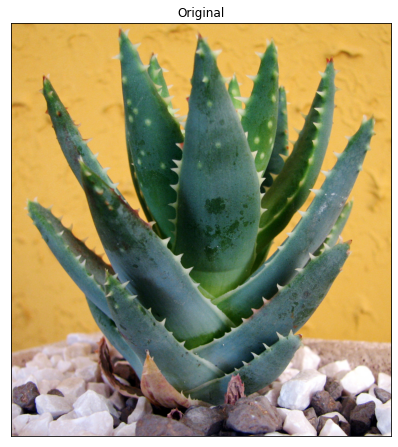

In [27]:
img = plt.imread('cactus.jpg')
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
a = 1/3
b = 1/4
c = 1/4-a/2
print(a,b,c, a + 2*b + 2*c)

kernel_1D = [c, b, a, b, c]


0.3333333333333333 0.25 0.08333333333333334 1.0


In [29]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


In [30]:
def reduce(img, kernel):
  new_img = img.copy()
  k = int(len(kernel) / 2)
  row = len(img)
  col = len(img[0])
  # print(row, col)
  new_img = img.copy()
  # REDUCE across rows to get a r x(c/2) image
  for i in range(0, row ):
    for j in range(0, col):
      if j < k:
        pixel_matrix = img[i, j:j+2+1]
        new_kernel = [a, 2 * b, 2 * c]
        val_m = pixel_matrix * new_kernel
        val = val_m.sum()
        new_img[i][j] = val
        continue
      elif j >= col - k:
        pixel_matrix = img[i, j-2:j+1]
        new_kernel = [2*c, 2*b, a]
        val_m = pixel_matrix * new_kernel
        val = val_m.sum()
        new_img[i][j] = val
        continue
      pixel_matrix = img[i, j - k : j + k + 1]
      val_m = pixel_matrix * kernel
      val = val_m.sum()
      new_img[i][j] = val
  
  new_img = new_img[::, ::2]
  img = new_img.copy()
  row = len(img)
  col = len(img[0])
  # REDUCE across columns to get a(r/2) x (c/2) image 
  for i in range(0, row):
    for j in range(0, col):
      if i < k:
        pixel_matrix = img[i:i+2+1, j]
        new_kernel = [a, 2 * b, 2 * c]
        val_m = pixel_matrix * new_kernel
        val = val_m.sum()
        new_img[i][j] = val
        continue
      elif i >= row - k:
        pixel_matrix = img[i-2:i+1, j]
        new_kernel = [2*c, 2*b, a]
        val_m = pixel_matrix * new_kernel
        val = val_m.sum()
        new_img[i][j] = val
        continue
      pixel_matrix = img[i - k: i + k + 1,j]
      val_m = pixel_matrix * kernel
      val = val_m.sum()
      new_img[i][j] = val
  return new_img[::2,::]
  

In [31]:
def construct_reduce_pyramid(img, pyramid_sz=4):
  g_l = img.copy()
  pyramid = []
  pyramid.append(g_l)
  for i in range(1, pyramid_sz):
    print("Reduce start", i)
    reduced_img = reduce(g_l, kernel_1D)
    pyramid.append(reduced_img)
    g_l = reduced_img
  print("Finish")
  return pyramid

In [32]:
reduce_pyramid = construct_reduce_pyramid(rgb2gray(img), pyramid_sz=6)

Reduce start 1
Reduce start 2
Reduce start 3
Reduce start 4
Reduce start 5
Finish


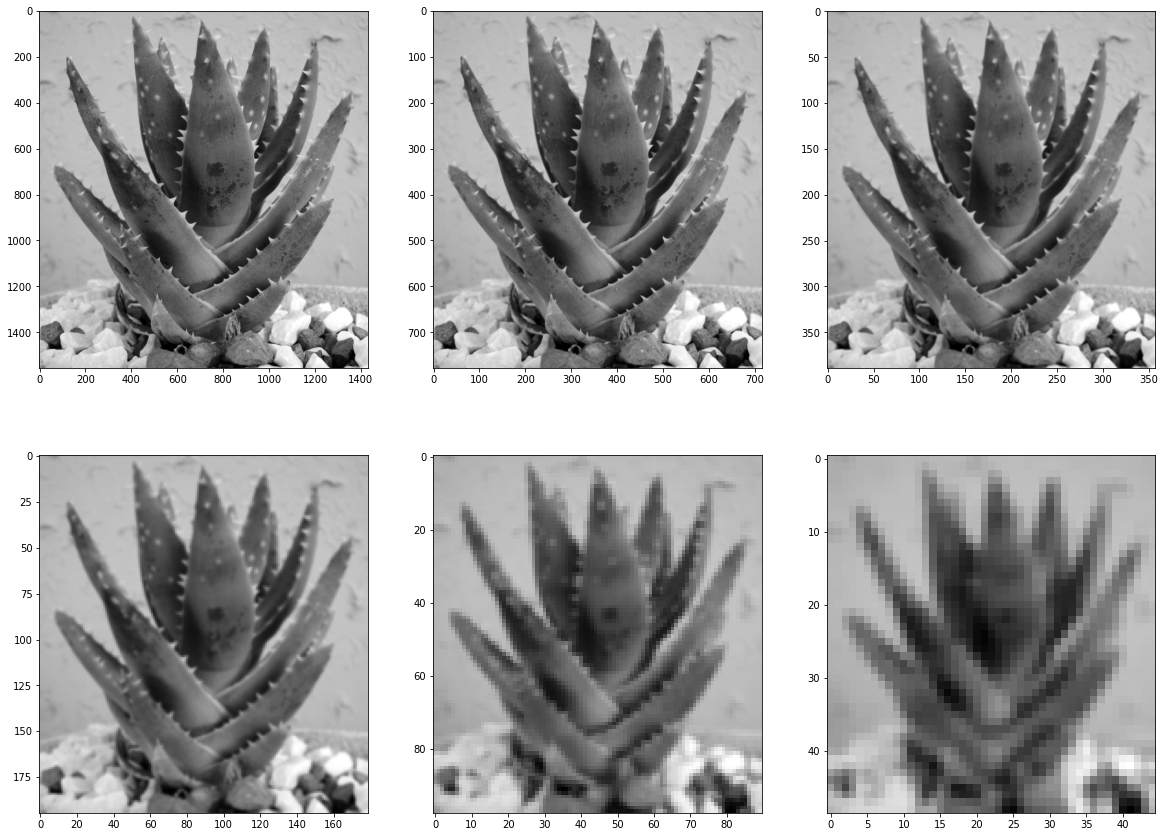

In [33]:

sz = len(reduce_pyramid)
c = 3
r = round(sz/c)

f, axarr = plt.subplots(r, c)
f.set_figwidth(20)
f.set_figheight(15)
i = 0
j = 0
for k in range(sz):
  axarr[i,j].imshow(reduce_pyramid[k], cmap='gray')
  j = j + 1
  if(k % c == c-1):
    i = i + 1
    j = 0


In [34]:
def expand_boundary_update_row(j, c1, g_1, kernel):
  sum = 0
  if j < k:
    if j == 1:
      p = -1
      sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
      p = 1
      sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
    else:
      p = -2
      sum = sum + (2 * kernel[p + 2] * g_1[i][int((j - p) / 2)])
      p = 0
      sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
  elif j >= c1-k:
    if j % 2 == 0 and j == c1 - 2:
      p = 2
      sum = sum + (2 * kernel[p + 2] * g_1[i][int((j - p) / 2)])
      p = 0
      sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
    elif j % 2 == 0 and j == c1 - 1:
      p=2
      sum = sum + (0.5 * g_1[i][int((j - p) / 2)])
    elif j % 2 == 1:
      p = 1
      sum = sum + (2 * kernel[p + 2] * g_1[i][int((j - p) / 2)])
  return sum

def expand_boundary_update_col(i, r1, g_1, kernel):
  sum = 0
  if i < k:
    if i == 1:
      p = -1
      sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
      p = 1
      sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
    else:
      p = -2
      sum = sum + (2 * kernel[p + 2] * g_1[int((i - p) / 2)][j])
      p = 0
      sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
  elif i >= r1-k:
    if i % 2 == 0 and i == r1 - 2:
      p = 2
      sum = sum + (2 * kernel[p + 2] * g_1[int((i - p) / 2)][j])
      p = 0
      sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
    elif i % 2 == 0 and i == r1 - 1:
      p=2
      sum = sum + (0.5 * g_1[int((i - p) / 2)][j])
    elif i % 2 == 1:
      p = 1
      sum = sum + (2 * kernel[p + 2] * g_1[int((i - p) / 2)][j])
  return sum


In [42]:
def expand(g_0, g_1, kernel):
  r1 = len(g_0)
  c1 = len(g_0[0])
  r2 = len(g_1)
  c2 = len(g_1[1])

  # print(r1, c1, r2, c2)

  expand_img = np.zeros((r1, c1))
  k = int(len(kernel) / 2)
  # EXPAND across rows to get a rx(2*c) image
  for i in range(0, r2):
    for j in range(0, c1):
      sum = 0
      if j < k:
        if j % 2 == 0:
          sum = sum + (kernel[0] * g_1[i][0])
          sum = sum + (kernel[2] * g_1[i][1])
          sum = sum + (kernel[4] * g_1[i][2])
        else:
          sum = sum + (kernel[1] * g_1[i][1])
          sum = sum + (kernel[3] * g_1[i][2])
        expand_img[i,j] = 2 * sum
        continue
      elif j >= c1 - k:
        if j % 2 == 0:
          sum = sum + (kernel[4] * g_1[i][c2-3])
          sum = sum + (kernel[2] * g_1[i][c2-2])
          sum = sum + (kernel[0] * g_1[i][c2-1])
        else:
          sum = sum + (kernel[3] * g_1[i][c2-2])
          sum = sum + (kernel[1] * g_1[i][c2-1])
        expand_img[i,j] = 2 * sum
        continue
      for p in range(-k, k + 1):
        try:
          if j % 2 == 0 and p % 2 == 0:
            sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
          elif j % 2 == 1 and p % 2 == 1:
            sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
        except:
          print(i, j, p)
          return
      expand_img[i,j] = 2 * sum
  # print(expand_img.max())
  g_1 = expand_img.copy()
  # EXPAND across cols to get a (2*r)x(2*c) image
  for i in range(0, r1):
    for j in range(0, c1):
      sum = 0
      if i < k:
        if i % 2 == 0:
          sum = sum + (kernel[0] * g_1[0][j])
          sum = sum + (kernel[2] * g_1[1][j])
          sum = sum + (kernel[4] * g_1[2][j])
        else:
          sum = sum + (kernel[1] * g_1[1][j])
          sum = sum + (kernel[3] * g_1[2][j])
        expand_img[i,j] = 2 * sum
        continue
      elif i >= r1 - k:
        if i % 2 == 0:
          sum = sum + (kernel[4] * g_1[r2-3][j])
          sum = sum + (kernel[2] * g_1[r2-2][j])
          sum = sum + (kernel[0] * g_1[r2-1][j])
        else:
          sum = sum + (kernel[3] * g_1[r2-2][j])
          sum = sum + (kernel[1] * g_1[r2-1][j])
        expand_img[i,j] = 2 * sum
        continue
      for p in range(-k, k + 1):
        try:
          if i % 2 == 0 and p % 2 == 0:
            sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
          elif i % 2 == 1 and p % 2 == 1:
            sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
        except:
          print(i, j, p)
          return
      expand_img[i,j] = 2 * sum
  # print(expand_img.max())
  return expand_img



In [36]:
def construct_expand_pyramid(reduce_pyramid):
  expand_pyramid = []
  for i in range(0, len(reduce_pyramid)-1):
    print("Start expand", i)
    g_0 = reduce_pyramid[i]
    g_1 = reduce_pyramid[i + 1]
    expand_g1 = expand(g_0, g_1, kernel_1D)
    expand_pyramid.append(expand_g1)
  return expand_pyramid


In [43]:
expand_pyramid = construct_expand_pyramid(reduce_pyramid)

Start expand 0
Start expand 1
Start expand 2
Start expand 3
Start expand 4


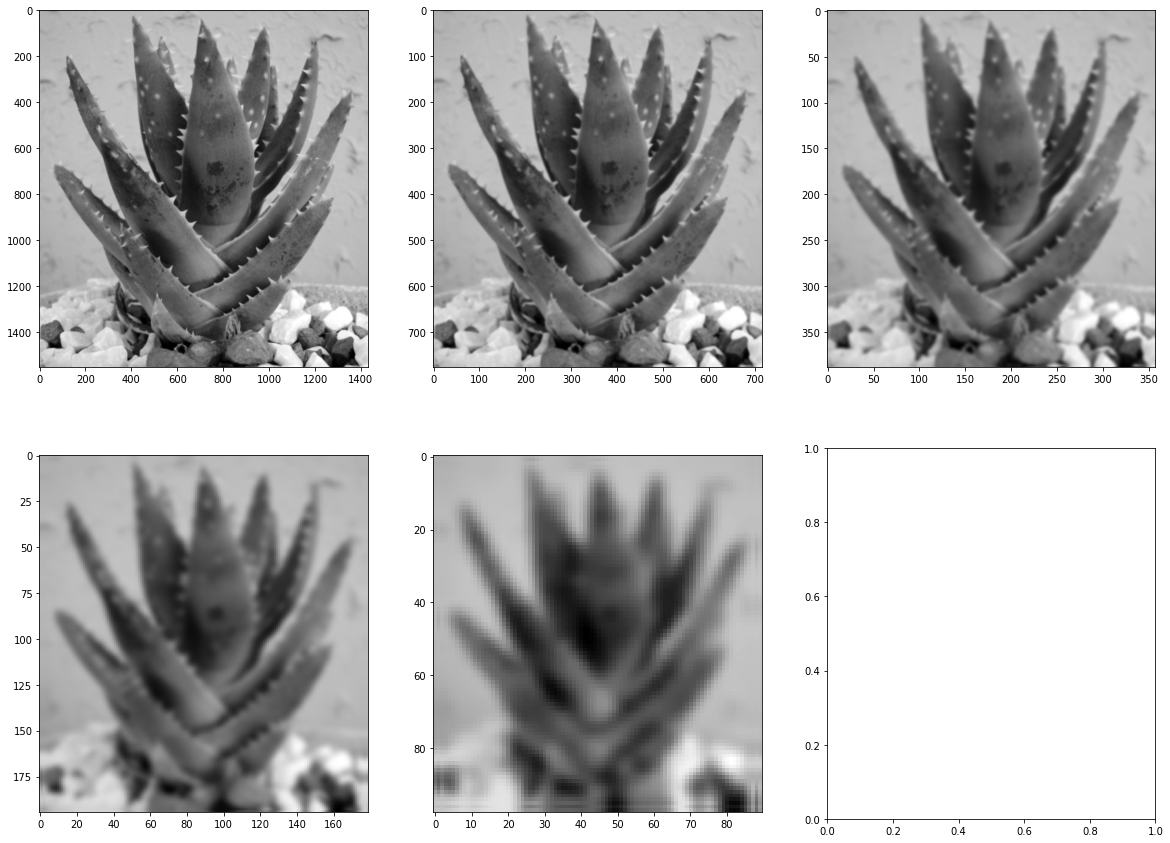

In [44]:
sz = len(expand_pyramid)
c = 3
r = round(sz/c)

f, axarr = plt.subplots(r, c)
f.set_figwidth(20)
f.set_figheight(15)
i = 0
j = 0
for k in range(sz):
  axarr[i,j].imshow(expand_pyramid[k], cmap='gray')
  j = j + 1
  if(k % c == c-1):
    i = i + 1
    j = 0
 

In [45]:
def construct_laplacian_pyramid(reduce_pyramid, expand_pyramid):
  laplacian_pyramid = []
  for i in range(len(expand_pyramid)):
    g_0 = reduce_pyramid[i]
    expand_g1 = expand_pyramid[i]
    l_i = g_0 - expand_g1
    laplacian_pyramid.append(l_i)
  return laplacian_pyramid

In [46]:
laplacian_pyramid = construct_laplacian_pyramid(reduce_pyramid, expand_pyramid)

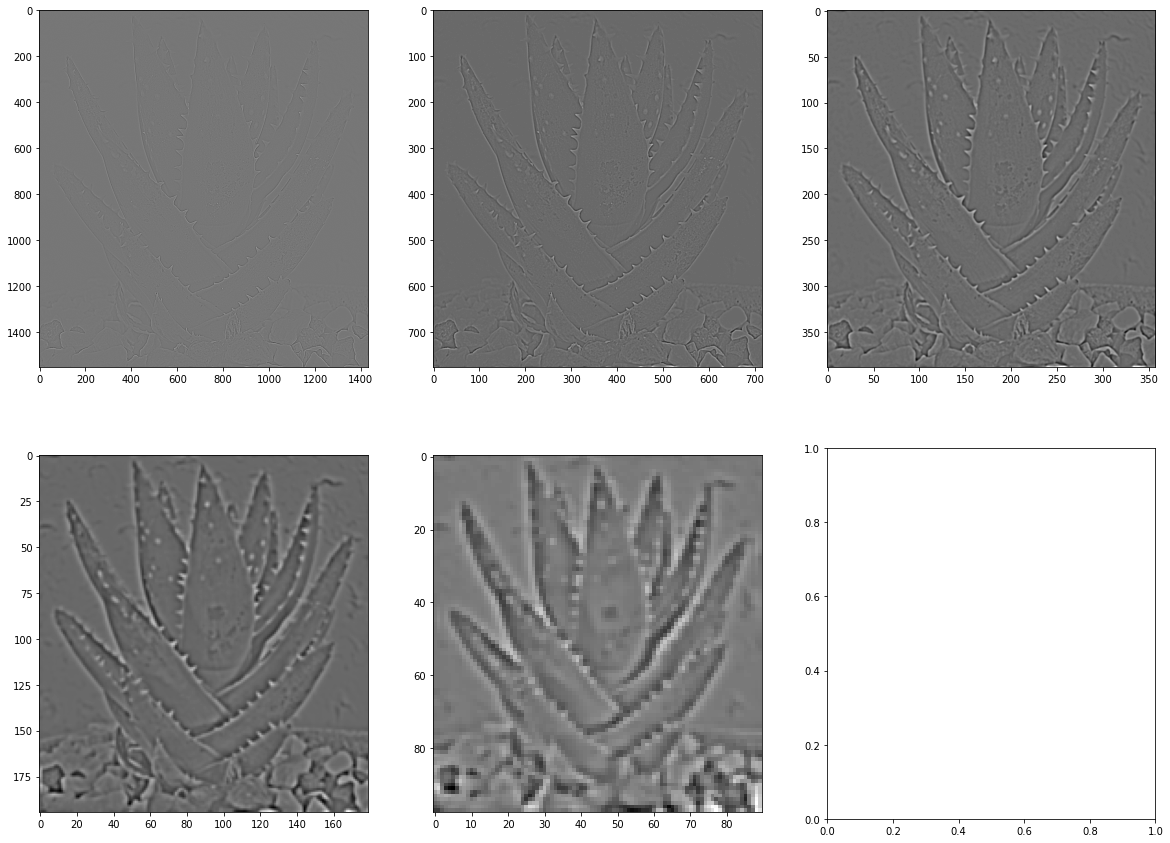

In [47]:
sz = len(laplacian_pyramid)
c = 3
r = round(sz/c)

f, axarr = plt.subplots(r, c)
f.set_figwidth(20)
f.set_figheight(15)
i = 0
j = 0
for k in range(sz):
  axarr[i,j].imshow(laplacian_pyramid[k], cmap='gray')
  j = j + 1
  if(k % c == c-1):
    i = i + 1
    j = 0
 